In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from statsmodels.formula.api import ols      # For n-way ANOVA
from statsmodels.stats.anova import _get_covariance,anova_lm # For n-way ANOVA
%matplotlib inline

In [2]:
DF = pd.read_csv('1 paul-newfood.csv')

In [3]:
DF.head()

,Sales,PriceLevel,AdLevel,StoreSize
0,620,1,1,34
1,774,1,1,41
2,955,1,2,32
3,669,1,2,28
4,623,1,1,34


In [6]:
DF.describe()

,Sales,PriceLevel,AdLevel,StoreSize
count,24.000000,24.000000,24.000000,24.000000
mean,571.416667,2.000000,1.500000,32.333333
std,212.629279,0.834058,0.510754,6.424590
min,294.000000,1.000000,1.000000,19.000000
25%,393.250000,1.000000,1.000000,28.750000
50%,550.000000,2.000000,1.500000,32.000000
75%,677.000000,3.000000,2.000000,37.000000
max,1208.000000,3.000000,2.000000,43.000000


In [7]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Sales       24 non-null     int64
 1   PriceLevel  24 non-null     int64
 2   AdLevel     24 non-null     int64
 3   StoreSize   24 non-null     int64
dtypes: int64(4)
memory usage: 896.0 bytes


In [4]:
DF.PriceLevel.value_counts

<bound method IndexOpsMixin.value_counts of 0     1
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     2
9     2
10    2
11    2
12    2
13    2
14    2
15    2
16    3
17    3
18    3
19    3
20    3
21    3
22    3
23    3
Name: PriceLevel, dtype: int64>

In [5]:
DF.AdLevel.value_counts

<bound method IndexOpsMixin.value_counts of 0     1
1     1
2     2
3     2
4     1
5     1
6     2
7     2
8     1
9     1
10    2
11    2
12    1
13    1
14    2
15    2
16    1
17    1
18    2
19    2
20    1
21    1
22    2
23    2
Name: AdLevel, dtype: int64>

In [6]:
formula = 'Sales ~ (PriceLevel) + (AdLevel)'
model = ols(formula, DF).fit()
aov_table = anova_lm(model)
print(aov_table)

              df         sum_sq        mean_sq          F    PR(>F)
PriceLevel   1.0  590976.562500  590976.562500  27.649652  0.000033
AdLevel      1.0      32.666667      32.666667   0.001528  0.969185
Residual    21.0  448848.604167   21373.743056        NaN       NaN


In [7]:
formula = 'Sales ~ C(PriceLevel) + C(AdLevel)'
model = ols(formula, DF).fit()
aov_table = anova_lm(model)
print(aov_table)

                 df         sum_sq        mean_sq          F    PR(>F)
C(PriceLevel)   2.0  600412.583333  300206.291667  13.663982  0.000182
C(AdLevel)      1.0      32.666667      32.666667   0.001487  0.969624
Residual       20.0  439412.583333   21970.629167        NaN       NaN


In [8]:
DF.PriceLevel = pd.Categorical(DF.PriceLevel)
DF.AdLevel = pd.Categorical(DF.AdLevel)
formula = 'Sales ~ (PriceLevel) + (AdLevel)'
model = ols(formula, DF).fit()
aov_table = anova_lm(model)
print(aov_table)

              df         sum_sq        mean_sq          F    PR(>F)
PriceLevel   2.0  600412.583333  300206.291667  13.663982  0.000182
AdLevel      1.0      32.666667      32.666667   0.001487  0.969624
Residual    20.0  439412.583333   21970.629167        NaN       NaN


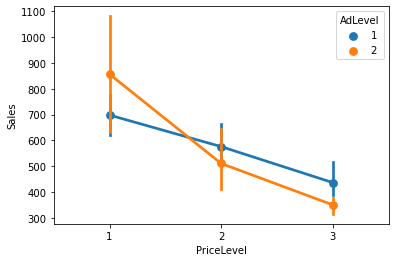

In [9]:
sns.pointplot(x='PriceLevel', y='Sales', data=DF, hue='AdLevel');

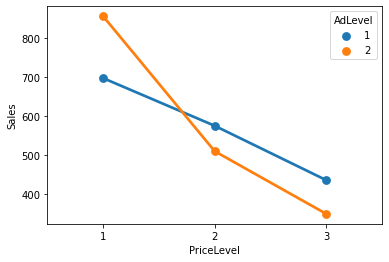

In [11]:
sns.pointplot(x='PriceLevel', y='Sales', data=DF, hue='AdLevel', ci=None);

In [12]:
DF = pd.read_csv('1 paul-newfood.csv')

In [13]:
formula = 'Sales ~ (PriceLevel) + (AdLevel) + (PriceLevel):(AdLevel)'
model = ols(formula, DF).fit()
aov_table = anova_lm(model)
print(aov_table)

                      df         sum_sq        mean_sq          F    PR(>F)
PriceLevel           1.0  590976.562500  590976.562500  30.407768  0.000021
AdLevel              1.0      32.666667      32.666667   0.001681  0.967704
PriceLevel:AdLevel   1.0   60147.562500   60147.562500   3.094798  0.093833
Residual            20.0  388701.041667   19435.052083        NaN       NaN


In [14]:
formula = 'Sales ~ C(PriceLevel) + C(AdLevel) + C(PriceLevel):C(AdLevel)'
model = ols(formula, DF).fit()
aov_table = anova_lm(model)
print(aov_table)

                            df         sum_sq        mean_sq          F  \
C(PriceLevel)              2.0  600412.583333  300206.291667  14.781913   
C(AdLevel)                 1.0      32.666667      32.666667   0.001608   
C(PriceLevel):C(AdLevel)   2.0   73850.083333   36925.041667   1.818159   
Residual                  18.0  365562.500000   20309.027778        NaN   

                            PR(>F)  
C(PriceLevel)             0.000159  
C(AdLevel)                0.968450  
C(PriceLevel):C(AdLevel)  0.190898  
Residual                       NaN  


In [15]:
DF.PriceLevel = pd.Categorical(DF.PriceLevel)
DF.AdLevel = pd.Categorical(DF.AdLevel)
formula = 'Sales ~ (PriceLevel) + (AdLevel) + (PriceLevel):(AdLevel)'
model = ols(formula, DF).fit()
aov_table = anova_lm(model)
print(aov_table)

                      df         sum_sq        mean_sq          F    PR(>F)
PriceLevel           2.0  600412.583333  300206.291667  14.781913  0.000159
AdLevel              1.0      32.666667      32.666667   0.001608  0.968450
PriceLevel:AdLevel   2.0   73850.083333   36925.041667   1.818159  0.190898
Residual            18.0  365562.500000   20309.027778        NaN       NaN


In [16]:
DF = pd.read_csv('1 paul-newfood.csv')
formula = 'Sales ~ (PriceLevel) + (AdLevel) + StoreSize + (PriceLevel):(AdLevel)'
model = ols(formula, DF).fit()
aov_table = anova_lm(model,type=2)
print(aov_table)

                      df         sum_sq        mean_sq          F  \
PriceLevel           1.0  590976.562500  590976.562500  61.586939   
AdLevel              1.0      32.666667      32.666667   0.003404   
StoreSize            1.0  222290.553610  222290.553610  23.165377   
PriceLevel:AdLevel   1.0   44237.661181   44237.661181   4.610102   
Residual            19.0  182320.389376    9595.809967        NaN   

                          PR(>F)  
PriceLevel          2.226910e-07  
AdLevel             9.540823e-01  
StoreSize           1.208685e-04  
PriceLevel:AdLevel  4.490278e-02  
Residual                     NaN  


In [17]:
formula = 'Sales ~ C(PriceLevel) + C(AdLevel) + StoreSize + C(PriceLevel):C(AdLevel)'
model = ols(formula, DF).fit()
aov_table = anova_lm(model,type=2)
print(aov_table)

                            df         sum_sq        mean_sq          F  \
C(PriceLevel)              2.0  600412.583333  300206.291667  29.483426   
C(AdLevel)                 1.0      32.666667      32.666667   0.003208   
C(PriceLevel):C(AdLevel)   2.0   73850.083333   36925.041667   3.626429   
StoreSize                  1.0  192465.010526  192465.010526  18.902095   
Residual                  17.0  173097.489474   10182.205263        NaN   

                            PR(>F)  
C(PriceLevel)             0.000003  
C(AdLevel)                0.955492  
C(PriceLevel):C(AdLevel)  0.048790  
StoreSize                 0.000438  
Residual                       NaN  


In [18]:
DF.PriceLevel = pd.Categorical(DF.PriceLevel)
DF.AdLevel = pd.Categorical(DF.AdLevel)
formula = 'Sales ~ (PriceLevel) + (AdLevel) + StoreSize + (PriceLevel):(AdLevel)'
model = ols(formula, DF).fit()
aov_table = anova_lm(model,type=2)
print(aov_table)

                      df         sum_sq        mean_sq          F    PR(>F)
PriceLevel           2.0  600412.583333  300206.291667  29.483426  0.000003
AdLevel              1.0      32.666667      32.666667   0.003208  0.955492
PriceLevel:AdLevel   2.0   73850.083333   36925.041667   3.626429  0.048790
StoreSize            1.0  192465.010526  192465.010526  18.902095  0.000438
Residual            17.0  173097.489474   10182.205263        NaN       NaN
